# Ejemplo sencillo para  ilustrar métodos de interpolación de datos 2D
 
Métodos potenciales de prospección, FCAG, {{import datetime; print(datetime.datetime.now().strftime("%Y"))}}.  <!-- add extension "Python Markdown and "trust" notebook -->

In [1]:
import numpy as np   # para calcular, numerical python.
import matplotlib.pyplot as plt # para graficar, matplotlib.
# gráficos dentro de la notebook
#%matplotlib inline
plt.xkcd()
plt.rcParams.update({'font.size': 14}) # tamaño de fuente

### Lectura de la cuadrícula del dato

Leemos el archivo **datos2D.dat** de anomalías de Bouguer. La estructura del dato es $x$ (km) | $y$ (km) | $g_z$ (mGal). Como podemos observar, datos han sido previamente dispuestos en una cuadrícula.

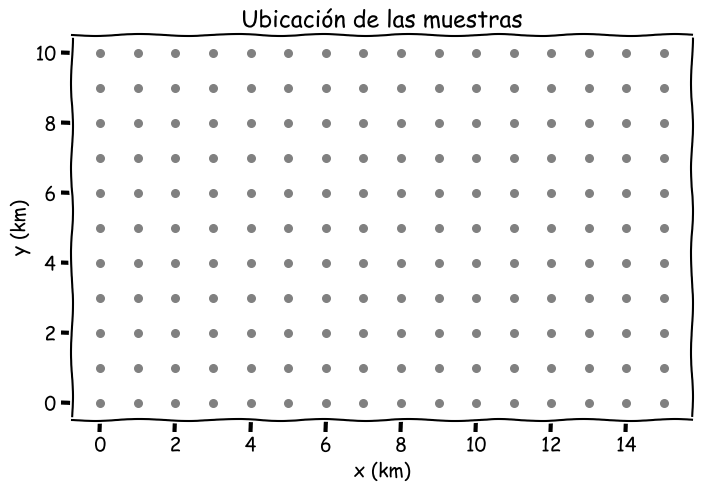

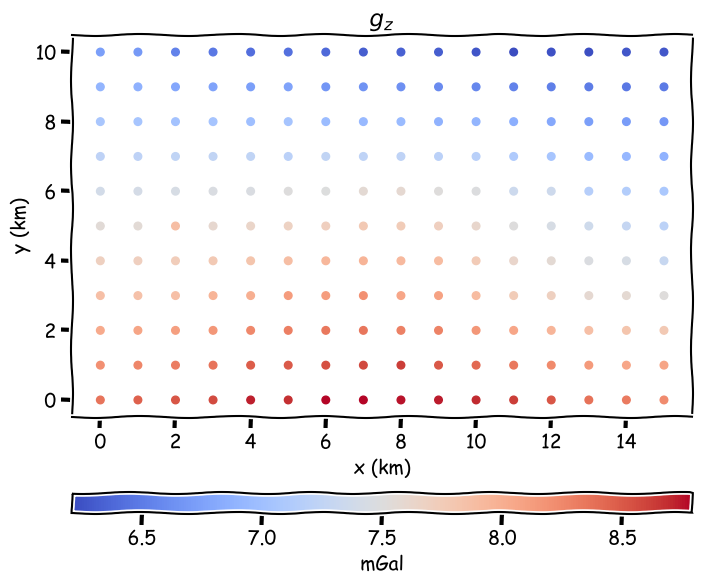

In [2]:
data   = np.loadtxt('../../data/datos2D.dat') # las lineas que comienzan con '#' son ignoradas

x,y,gz = data[:,0],data[:,1],data[:,2]  # columnas del dato en cada vector

nx=np.unique(x).shape[0] # número de coordenadas en x
ny=np.unique(y).shape[0] # número de coordenadas en y

GZ = gz.reshape(ny,nx) # genero matriz con el vector de mediciones de gravedad

plt.figure(figsize=(8,5))
plt.scatter(x,y,s=30,color="gray")
plt.xlabel("x (km)")
plt.ylabel("y (km)")
plt.title("Ubicación de las muestras")
plt.show()

plt.figure(figsize=(8,7))
plt.scatter(x,y,c=gz,s=30,cmap="coolwarm")
plt.xlabel("x (km)")
plt.ylabel("y (km)")
plt.title("$g_z$")
plt.colorbar(label="mGal", pad=0.14, aspect=30, orientation="horizontal")
plt.show()

### Resultados
Visualizamos el dato original $g_z$, y el resultado de interpolar $g_z$ con algunos métodos tradicionales.

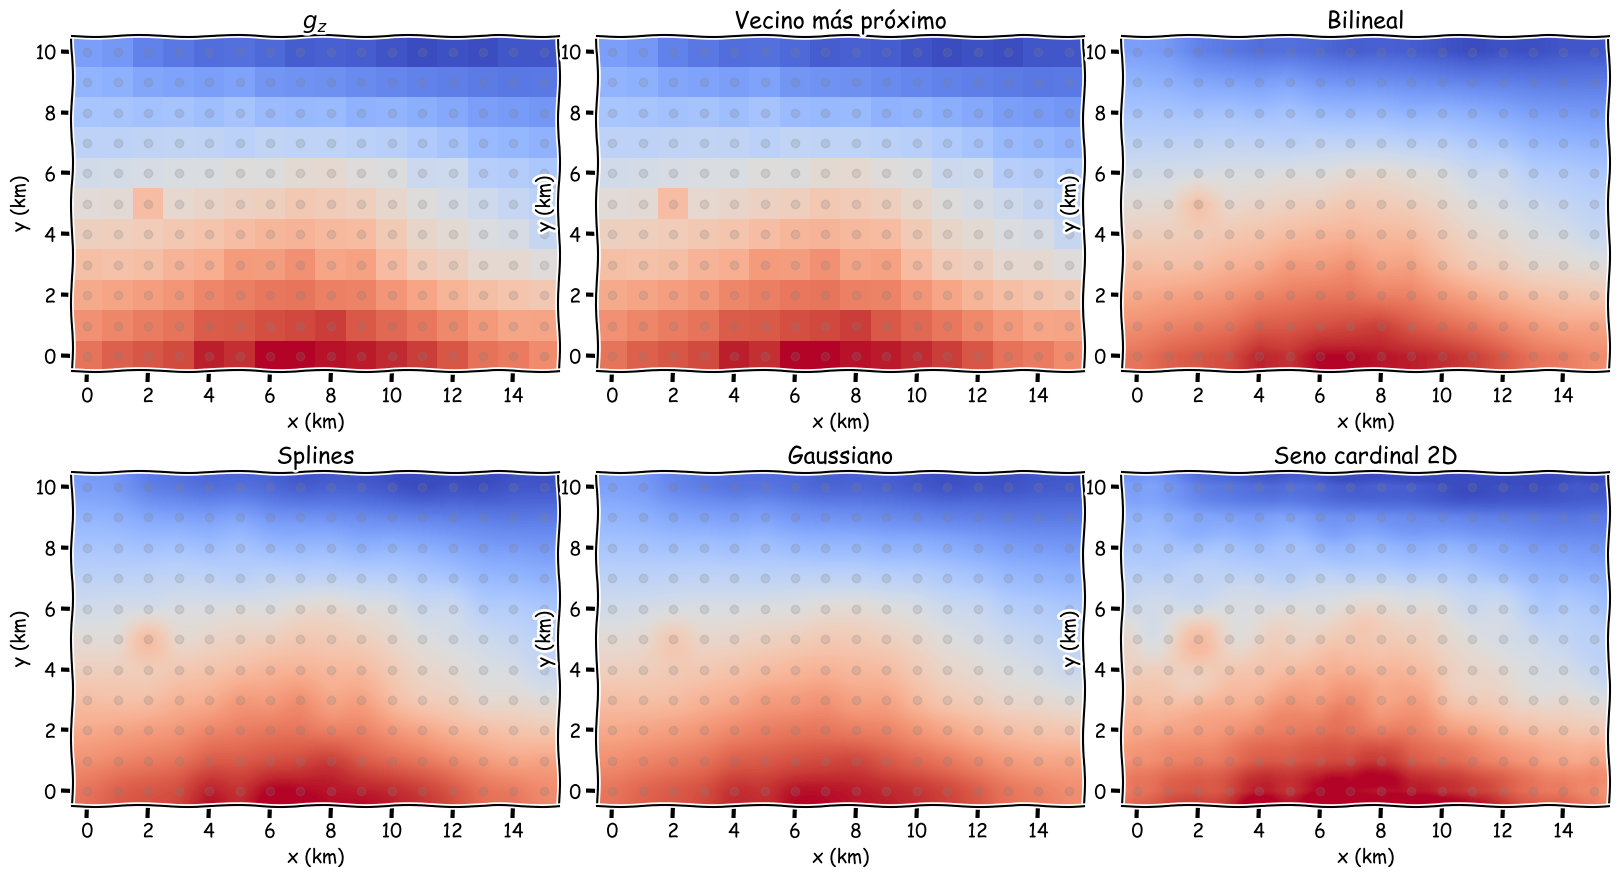

In [3]:
cmap    = 'coolwarm'
methods = ['none', 'nearest', 'bilinear', 'spline16','gaussian','sinc']
names   = ['$g_z$','Vecino más próximo','Bilineal','Splines','Gaussiano','Seno cardinal 2D']

fig, axes = plt.subplots(2, 3, figsize=(20, 10))#, subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

for ax, interp_method,names in zip(axes.flat, methods,names):
    ax.imshow(GZ, origin="lower",interpolation=interp_method, cmap=cmap)
    ax.scatter(x,y,alpha=0.2,color="gray")
    ax.set_title(names)
    ax.set_xlabel("x (km)")
    ax.set_ylabel("y (km)")    
plt.show()

Notemos que los resultados interpolados son directamente visualizados. ¿Cómo se hará para obtener los arreglos NumPy correspondientes?

 Otro método que puede ser utilizado para interpolar mediciones de los métodos potenciales se describe [aquí](http://gmt.soest.hawaii.edu/doc/latest/surface.html).

Eso es todo por hoy.